## Comparative analysis of border and non-border states in Mexico 

#### We analyze how employment, wages and the number of factories in Mexico evolved between 2007 and 2021. Also between 2016 and 2021

#### The border states are: Baja California, Sonora, Tamaulipas, Coahuila, Chihuahua and Nuevo Leon.

In [1]:
#import libraries
import pandas as pd
import numpy as np
import re

In [2]:
#Open Manufacturing workers data
df = pd.read_csv("data/workers-factories-wages-mexico-annual.csv")
df

,Year,State,Border,Jobs,Factories,Average wage
0,2007,Total nacional,No,1902121.0,5140.0,13120.12137
1,2008,Total nacional,No,1738182.0,5254.0,13360.18494
2,2009,Total nacional,No,1645291.0,5214.0,14170.40792
3,2010,Total nacional,No,1810482.0,5108.0,13945.50058
4,2011,Total nacional,No,1879114.0,5079.0,14183.43239
...,...,...,...,...,...,...
280,2017,Otras entidades federativas,No,134260.0,266.0,13080.53332
281,2018,Otras entidades federativas,No,143292.0,264.0,12842.36016
282,2019,Otras entidades federativas,No,142102.0,267.0,12634.71062
283,2020,Otras entidades federativas,No,135569.0,264.0,14349.70094


In [3]:
#Compare change in employment, factory and salaries between border and non-border states
df2 = pd.DataFrame()
df2 ["Jobs-Border"] = list(df.query("Border == 'Yes'").groupby("Year")["Jobs"].agg("sum"))
df2 ["Factories-Border"] = list(df.query("Border == 'Yes'").groupby("Year")["Factories"].agg("sum"))
df2 ["Wages-Border"] = list(df.query("Border == 'Yes'").groupby("Year")["Average wage"].agg("mean"))
df2 ["Jobs-NoBorder"] = list(df.query("Border == 'No'").groupby("Year")["Jobs"].agg("sum"))
df2 ["Factories-NoBorder"] = list(df.query("Border == 'No'").groupby("Year")["Factories"].agg("sum"))
df2 ["Wages-NoBorder"] = list(df.query("Border == 'No'").groupby("Year")["Average wage"].agg("mean"))

In [4]:
df2

,Jobs-Border,Factories-Border,Wages-Border,Jobs-NoBorder,Factories-NoBorder,Wages-NoBorder
0,1175978.0,3119.0,11917.411933,2628264.0,7161.0,14960.972057
1,1058339.0,3180.0,12286.596076,2418025.0,7328.0,14885.315660
2,991591.0,3149.0,13421.516222,2298991.0,7279.0,15093.038269
3,1102705.0,3078.0,12848.126353,2518259.0,7138.0,15072.372548
4,1136049.0,3058.0,12942.708285,2622179.0,7100.0,15732.556817
5,1212620.0,3053.0,12394.388670,2770900.0,7155.0,15996.520608
6,1286412.0,3065.0,12280.656158,2945632.0,7219.0,15458.367651
7,1381783.0,2977.0,12128.614717,3131521.0,7063.0,14948.257824
8,1449321.0,2968.0,12591.849593,3265791.0,7044.0,15697.940280
9,1530796.0,2990.0,12912.166998,3427458.0,7046.0,15770.114210


In [5]:
#Add year column
df2["Year"] = list(df["Year"].unique())
df2

,Jobs-Border,Factories-Border,Wages-Border,Jobs-NoBorder,Factories-NoBorder,Wages-NoBorder,Year
0,1175978.0,3119.0,11917.411933,2628264.0,7161.0,14960.972057,2007
1,1058339.0,3180.0,12286.596076,2418025.0,7328.0,14885.315660,2008
2,991591.0,3149.0,13421.516222,2298991.0,7279.0,15093.038269,2009
3,1102705.0,3078.0,12848.126353,2518259.0,7138.0,15072.372548,2010
4,1136049.0,3058.0,12942.708285,2622179.0,7100.0,15732.556817,2011
5,1212620.0,3053.0,12394.388670,2770900.0,7155.0,15996.520608,2012
6,1286412.0,3065.0,12280.656158,2945632.0,7219.0,15458.367651,2013
7,1381783.0,2977.0,12128.614717,3131521.0,7063.0,14948.257824,2014
8,1449321.0,2968.0,12591.849593,3265791.0,7044.0,15697.940280,2015
9,1530796.0,2990.0,12912.166998,3427458.0,7046.0,15770.114210,2016


In [6]:
df3 = pd.DataFrame()

In [7]:
#Calculate percentage changes
df3 ["Year"] = df2["Year"]
df3["Job change - border"] = df2["Jobs-Border"] / df2["Jobs-Border"].iat[0] * 100 
df3["Factories change - border"] = df2["Factories-Border"] / df2["Factories-Border"].iat[0] * 100
df3["Wages change - border"] = df2["Wages-Border"] / df2["Wages-Border"].iat[0] * 100
df3["Job change - no border"] = df2["Jobs-NoBorder"] / df2["Jobs-NoBorder"].iat[0] * 100 
df3["Factories change - no border"] = df2["Factories-NoBorder"] / df2["Factories-NoBorder"].iat[0] * 100
df3["Wages change - no border"] = df2["Wages-NoBorder"] / df2["Wages-NoBorder"].iat[0] * 100 

In [8]:
df3

,Year,Job change - border,Factories change - border,Wages change - border,Job change - no border,Factories change - no border,Wages change - no border
0,2007,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
1,2008,89.996497,101.955755,103.097855,92.000842,102.332077,99.494308
2,2009,84.320540,100.961847,112.621065,87.471845,101.647815,100.882738
3,2010,93.769186,98.685476,107.809703,95.814538,99.678816,100.744607
4,2011,96.604613,98.044245,108.603347,99.768478,99.148164,105.157317
5,2012,103.115875,97.883937,104.002352,105.427004,99.916213,106.921666
6,2013,109.390822,98.268676,103.048013,112.075195,100.809943,103.324621
7,2014,117.500753,95.447259,101.772220,119.147886,98.631476,99.915017
8,2015,123.243887,95.158705,105.659263,124.256582,98.366150,104.925938
9,2016,130.172163,95.864059,108.347073,130.407676,98.394079,105.408353


### Comparison between 2007 and 2021

<AxesSubplot:title={'center':'Manufacturing Jobs border v. no border (Mexico)'}, xlabel='Year'>

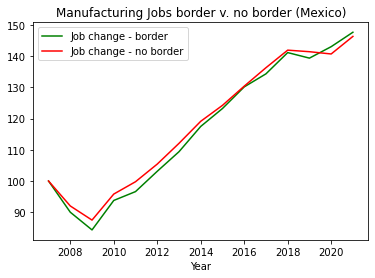

In [9]:
# Create a graphic
df3.plot(x="Year",
       y=["Job change - border", "Job change - no border"],
       title = "Manufacturing Jobs border v. no border (Mexico)",
       style = {"Job change - border":"green",
               "Job change - no border":"red"})

<AxesSubplot:title={'center':'Factories border v. no border (Mexico)'}, xlabel='Year'>

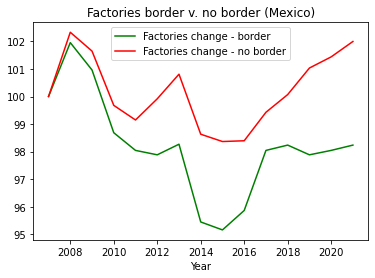

In [10]:
# Create a graphic
df3.plot(x="Year",
       y=["Factories change - border", "Factories change - no border"],
       title = "Factories border v. no border (Mexico)",
       style = {"Factories change - border":"green",
               "Factories change - no border":"red"})

<AxesSubplot:title={'center':'Manufacturing wages change border v. no border (Mexico)'}, xlabel='Year'>

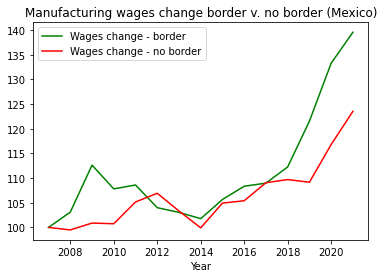

In [11]:
# Create a graphic
df3.plot(x="Year",
       y=["Wages change - border", "Wages change - no border"],
       title = "Manufacturing wages change border v. no border (Mexico)",
       style = {"Wages change - border":"green",
               "Wages change - no border":"red"})

### Conclusions (2007 v 2021)
###### The number of manufacturing jobs increased in Mexico both on border (49%) and non-border (46%) states between 2016 and 2021. 
###### The number of factories declined between 2008 and 2015, but then rebounded both border and nonborder states. Now: similar level to 2007.
###### Manufacturing wages increased more on  border (40%) and non border (24%) states.

### Comparison between 2016 and 2021

In [12]:
#Changes since 2016
df31 = df3.query("Year > 2015")
df31

,Year,Job change - border,Factories change - border,Wages change - border,Job change - no border,Factories change - no border,Wages change - no border
9,2016,130.172163,95.864059,108.347073,130.407676,98.394079,105.408353
10,2017,134.358976,98.044245,108.975468,136.323520,99.427454,109.063182
11,2018,141.176791,98.236614,112.260346,141.955907,100.069823,109.693675
12,2019,139.400992,97.883937,121.533289,141.459952,101.033375,109.161475
13,2020,143.072064,98.044245,133.283331,140.730688,101.438347,116.800873
14,2021,147.699107,98.236614,139.554344,146.366917,101.996928,123.530882


In [13]:
#Calculate percentage changes
df31 ["Year"] = df31["Year"]
df31["Job change - border"] = df31["Job change - border"] / df31["Job change - border"].iat[0] * 100 
df31["Factories change - border"] = df31["Factories change - border"] / df31["Factories change - border"].iat[0] * 100
df31["Wages change - border"] = df31["Wages change - border"] / df31["Wages change - border"].iat[0] * 100
df31["Job change - no border"] = df31["Job change - no border"] / df31["Job change - no border"].iat[0] * 100 
df31["Factories change - no border"] = df31["Factories change - no border"] / df31["Factories change - no border"].iat[0] * 100
df31["Wages change - no border"] = df31["Wages change - no border"] / df31["Wages change - no border"].iat[0] * 100 
df31

<ipython-input-13-d9d032790b9a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df31 ["Year"] = df31["Year"]
<ipython-input-13-d9d032790b9a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df31["Job change - border"] = df31["Job change - border"] / df31["Job change - border"].iat[0] * 100
<ipython-input-13-d9d032790b9a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation

,Year,Job change - border,Factories change - border,Wages change - border,Job change - no border,Factories change - no border,Wages change - no border
9,2016,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
10,2017,103.216366,102.274247,100.579983,104.536423,101.050241,103.467305
11,2018,108.453902,102.474916,103.611794,108.855484,101.703094,104.065448
12,2019,107.089710,102.107023,112.170348,108.475173,102.682373,103.560554
13,2020,109.909877,102.274247,123.015166,107.915954,103.093954,110.807986
14,2021,113.464433,102.474916,128.803058,112.237962,103.661652,117.192688


<AxesSubplot:title={'center':'Manufacturing Jobs border v. no border (Mexico)'}, xlabel='Year'>

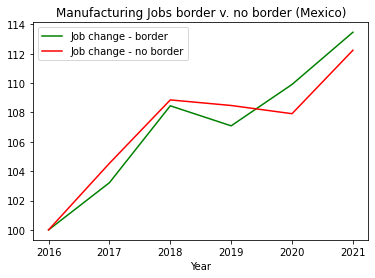

In [14]:
# Create a graphic
df31.plot(x="Year",
       y=["Job change - border", "Job change - no border"],
       title = "Manufacturing Jobs border v. no border (Mexico)",
       style = {"Job change - border":"green",
               "Job change - no border":"red"})

<AxesSubplot:title={'center':'Factories border v. no border (Mexico)'}, xlabel='Year'>

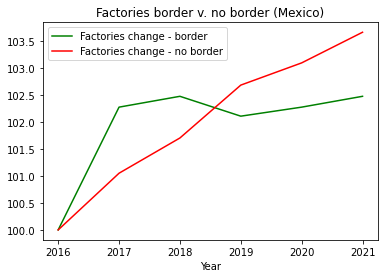

In [15]:
# Create a graphic
df31.plot(x="Year",
       y=["Factories change - border", "Factories change - no border"],
       title = "Factories border v. no border (Mexico)",
       style = {"Factories change - border":"green",
               "Factories change - no border":"red"})

<AxesSubplot:title={'center':'Manufacturing wages change border v. no border (Mexico)'}, xlabel='Year'>

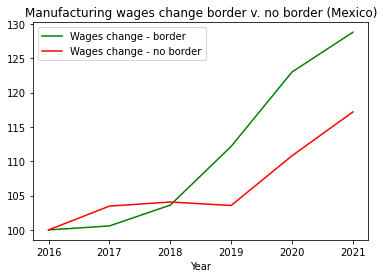

In [16]:
# Create a graphic
df31.plot(x="Year",
       y=["Wages change - border", "Wages change - no border"],
       title = "Manufacturing wages change border v. no border (Mexico)",
       style = {"Wages change - border":"green",
               "Wages change - no border":"red"})

### Conclusions (2016 v 2021)
###### The number of manufacturing jobs increased in Mexico both on border (14%) and non-border (12%) states between 2016 and 2021. 
###### The number of factories rebounded both border (3%) and nonborder (3.5%) states. 
###### Manufacturing wages increased more on  border (28%) and non border (18%) states.